**Mücahit Topçuoğlu**

**2112721061**

**Github linki:** https://github.com/mucahit-topcuoglu/YoloV8_Nesne_Tespiti



Bu kod bloğu, YOLO modelini kullanmak için gerekli olan `ultralytics` kütüphanesini kurar ve kurulumun başarıyla tamamlandığını kontrol eder.

In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


Bu kod bloğu, Google Drive'ınızı Colab ortamına bağlar. Ardından, Drive'ınızda bulunan bir zip dosyasının yolunu belirtir ve bu zip dosyasını Colab'deki belirli bir konuma çıkarır. Bu işlem, eğitim için gerekli olan veri setinin hazırlanmasını sağlar.

In [2]:
from google.colab import drive
import os
import shutil

# 1. Drive'ı bağla
drive.mount('/content/drive')

# 2. Dosya yolları
zip_path = '/content/drive/MyDrive/Colab Notebooks/datasets/dataset.zip' # Drive'a attığın dosya
extract_path = '/content/dataset' # Colab içinde açılacağı yer

# 3. Klasör temizliği (Eski denemeleri sil)
if os.path.exists(extract_path):
    shutil.rmtree(extract_path)
os.makedirs(extract_path)

# 4. Zip'ten çıkar
print("Dosya çıkarılıyor...")
!unzip -q "{zip_path}" -d "{extract_path}"
print("İşlem tamam! Dosyalar '/content/dataset' klasörüne çıkarıldı.")

Mounted at /content/drive
Dosya çıkarılıyor...
İşlem tamam! Dosyalar '/content/dataset' klasörüne çıkarıldı.


Bu kod bloğu, veri setinin yapılandırma dosyası olan `data.yaml` dosyasını okur. Eğitim, doğrulama ve test görüntüleri için yolları Colab ortamına uygun şekilde günceller ve güncellenmiş dosyayı tekrar kaydeder.

In [3]:
import yaml

yaml_path = '/content/dataset/data.yaml'

# Dosyayı oku
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Yolları Colab'e göre güncelle
data['train'] = '/content/dataset/train/images'
data['val'] = '/content/dataset/valid/images'
data['test'] = '/content/dataset/test/images'

# Tekrar kaydet
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("data.yaml dosyası Colab yollarına göre güncellendi!")

data.yaml dosyası Colab yollarına göre güncellendi!


Bu kod bloğu, `YOLOv8n` (nano) modelini yükler ve belirtilen veri seti (`data.yaml`) ile 50 epoch boyunca eğitim sürecini başlatır. `imgsz=640` görüntü boyutunu, `name='is_guvenligi_modeli'` ise modelin kaydedileceği klasör adını belirler.

In [4]:
from ultralytics import YOLO

# Modeli yükle (nano model - hızlı eğitim için)
model = YOLO('yolov8n.pt')

# Eğitimi başlat
results = model.train(
    data='/content/dataset/data.yaml',
    epochs=50,
    imgsz=640,
    name='is_guvenligi_modeli'
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=is_guvenligi_modeli, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

Okunan dosya: /content/runs/detect/is_guvenligi_modeli/results.csv


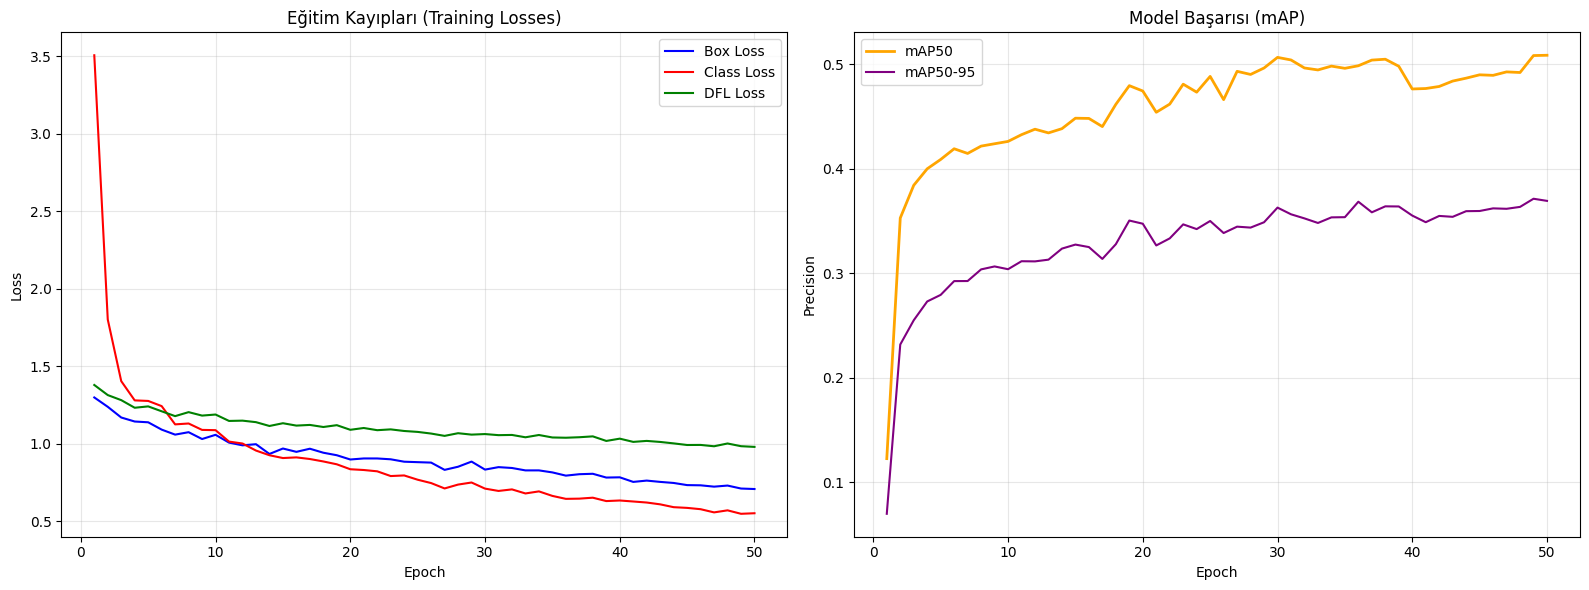

Grafik 'egitim_grafigi.png' olarak kaydedildi.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# 1. En son eğitimin yapıldığı klasörü otomatik bul
# Genellikle runs/detect/is_guvenligi_modeli klasöründedir.
# Eğer klasör isminiz farklıysa 'is_guvenligi_modeli' kısmını değiştirin.
results_path = '/content/runs/detect/is_guvenligi_modeli/results.csv'

# Eğer dosya orada yoksa, en son oluşturulan detect klasörüne bak
if not os.path.exists(results_path):
    print(f"'{results_path}' bulunamadı, en son eğitilen klasör aranıyor...")
    list_of_dirs = glob.glob('/content/runs/detect/*')
    if list_of_dirs:
        latest_dir = max(list_of_dirs, key=os.path.getctime)
        results_path = os.path.join(latest_dir, 'results.csv')

print(f"Okunan dosya: {results_path}")

# 2. Dosyayı Oku ve Grafiği Çiz
if os.path.exists(results_path):
    # CSV dosyasını oku
    df = pd.read_csv(results_path)

    # Sütun isimlerindeki boşlukları temizle (YOLO çıktısında boşluk olabilir)
    df.columns = df.columns.str.strip()

    # Grafik Alanı Oluştur
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # --- Grafik 1: Kayıplar (Losses) ---
    # train/box_loss, train/cls_loss, train/dfl_loss sütunları
    ax1.plot(df['epoch'], df['train/box_loss'], label='Box Loss', color='blue')
    ax1.plot(df['epoch'], df['train/cls_loss'], label='Class Loss', color='red')
    ax1.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss', color='green')
    ax1.set_title('Eğitim Kayıpları (Training Losses)')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # --- Grafik 2: Başarı Metrikleri (mAP) ---
    # metrics/mAP50(B) ve metrics/mAP50-95(B) sütunları
    ax2.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50', color='orange', linewidth=2)
    ax2.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95', color='purple')
    ax2.set_title('Model Başarısı (mAP)')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Precision')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # İsterseniz grafiği kaydedin
    fig.savefig('egitim_grafigi.png')
    print("Grafik 'egitim_grafigi.png' olarak kaydedildi.")

else:
    print("HATA: results.csv dosyası bulunamadı. Lütfen eğitimin tamamlandığından emin olun.")

Bu kod bloğu, eğitim tamamlandıktan sonra oluşturulan en iyi model ağırlıklarını (`best.pt`) yerel makinenize indirmenizi sağlar.

In [7]:
from google.colab import files

# Dosya yolunu bul ve indir
files.download('/content/runs/detect/is_guvenligi_modeli/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>